In [1675]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso


%matplotlib inline
pd.set_option("display.max_rows", None,"display.max_columns", None)
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')

sns.set(font_scale=1)

In [1676]:
#Step 1: Reading and Understanding the Data
cars = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

In [1677]:
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [1678]:
#Understanding the dataframe
cars.shape

(4340, 8)

In [1679]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [1680]:
#numerical stats
cars.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [1681]:
##Step 2: Cleaning the Data & Preprocessing

#Missing Value check
cars.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [1682]:
# Checking for duplicates
cars.loc[cars.duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
13,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
14,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
15,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
16,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
17,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
18,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
19,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
20,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
21,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
22,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


In [1683]:
cars.loc[cars['selling_price'] < 500].head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner


In [1684]:
#Pre procssing
cars['age'] = 2022 - cars['year']
cars.drop('year',axis=1,inplace = True)

In [1685]:
cars.rename(columns = {'selling_price':'selling_price(BWP)','owner':'past_owners'},inplace = True)

In [1686]:
cars.columns

Index(['name', 'selling_price(BWP)', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'past_owners', 'age'],
      dtype='object')

In [1687]:
#Splitting manufacturer from Car Name column
manufacturer = cars['name'].apply(lambda x : x.split(' ')[0])
cars.insert(3,"manufacturer",manufacturer)
cars.drop(['name'],axis=1,inplace=True)
cars.head()

,selling_price(BWP),km_driven,manufacturer,fuel,seller_type,transmission,past_owners,age
0,60000,70000,Maruti,Petrol,Individual,Manual,First Owner,15
1,135000,50000,Maruti,Petrol,Individual,Manual,First Owner,15
2,600000,100000,Hyundai,Diesel,Individual,Manual,First Owner,10
3,250000,46000,Datsun,Petrol,Individual,Manual,First Owner,5
4,450000,141000,Honda,Diesel,Individual,Manual,Second Owner,8


In [1688]:
#Step 3: Data Visualization

In [1689]:
cars.columns

Index(['selling_price(BWP)', 'km_driven', 'manufacturer', 'fuel',
       'seller_type', 'transmission', 'past_owners', 'age'],
      dtype='object')

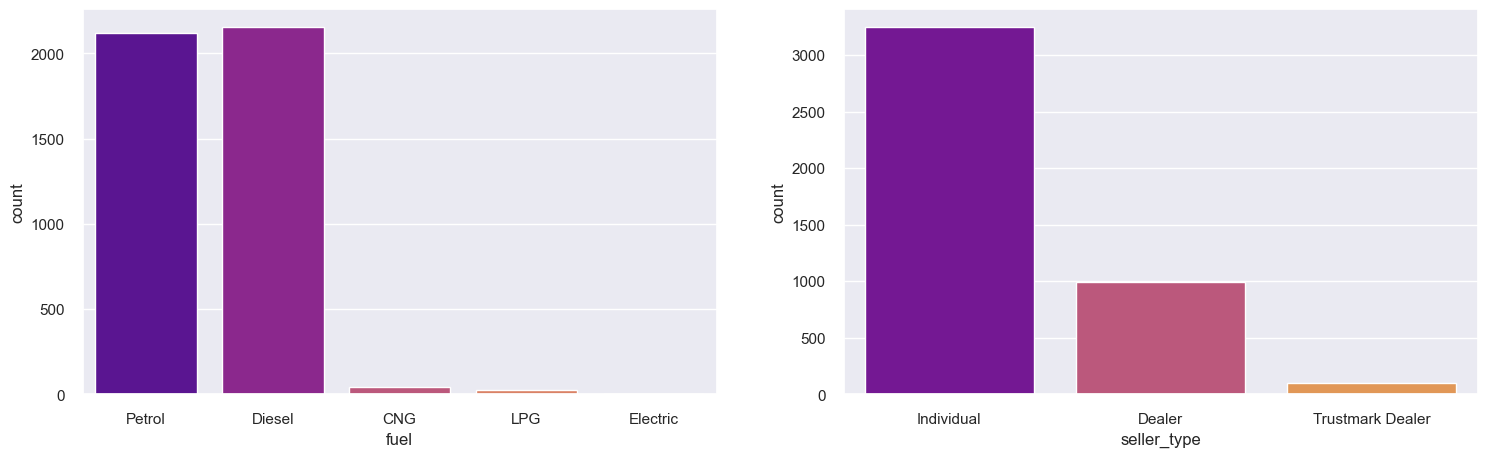

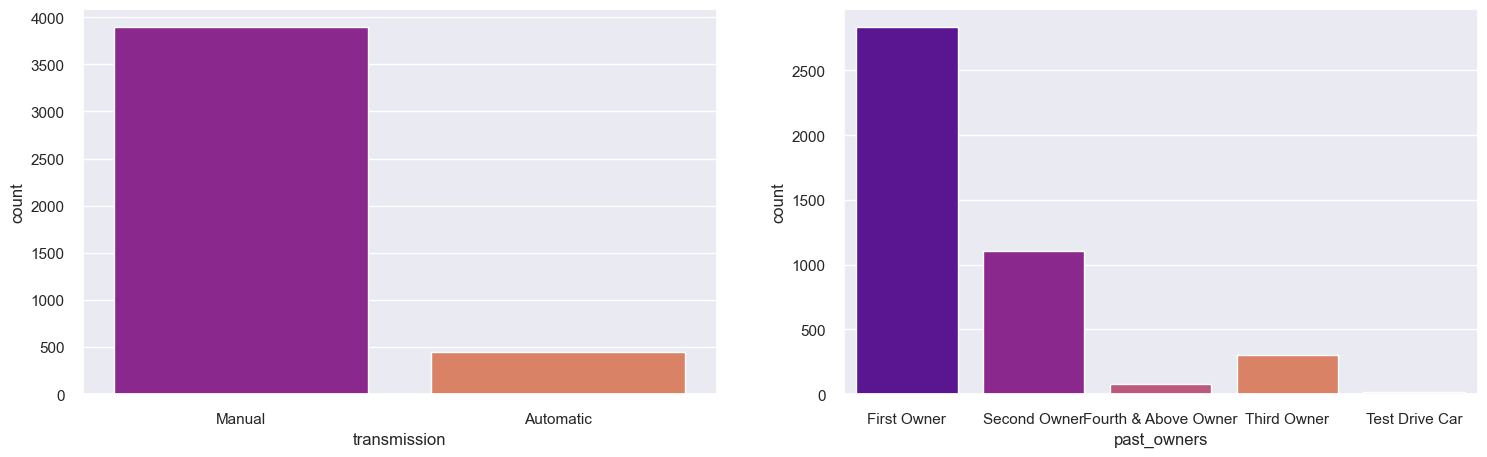

In [1690]:
car_cols = ['fuel','seller_type','transmission','past_owners']
i=0
while i < 4:
    fig = plt.figure(figsize=[18,5])
   
    plt.subplot(1,2,1)
    sns.countplot(x=car_cols[i], data=cars, palette=("plasma"))
    i += 1
    
    plt.subplot(1,2,2)
    sns.countplot(x=car_cols[i], data=cars, palette=("plasma"))
    i += 1
    
    plt.show()

In [1691]:
#Comments
#
#
#
#

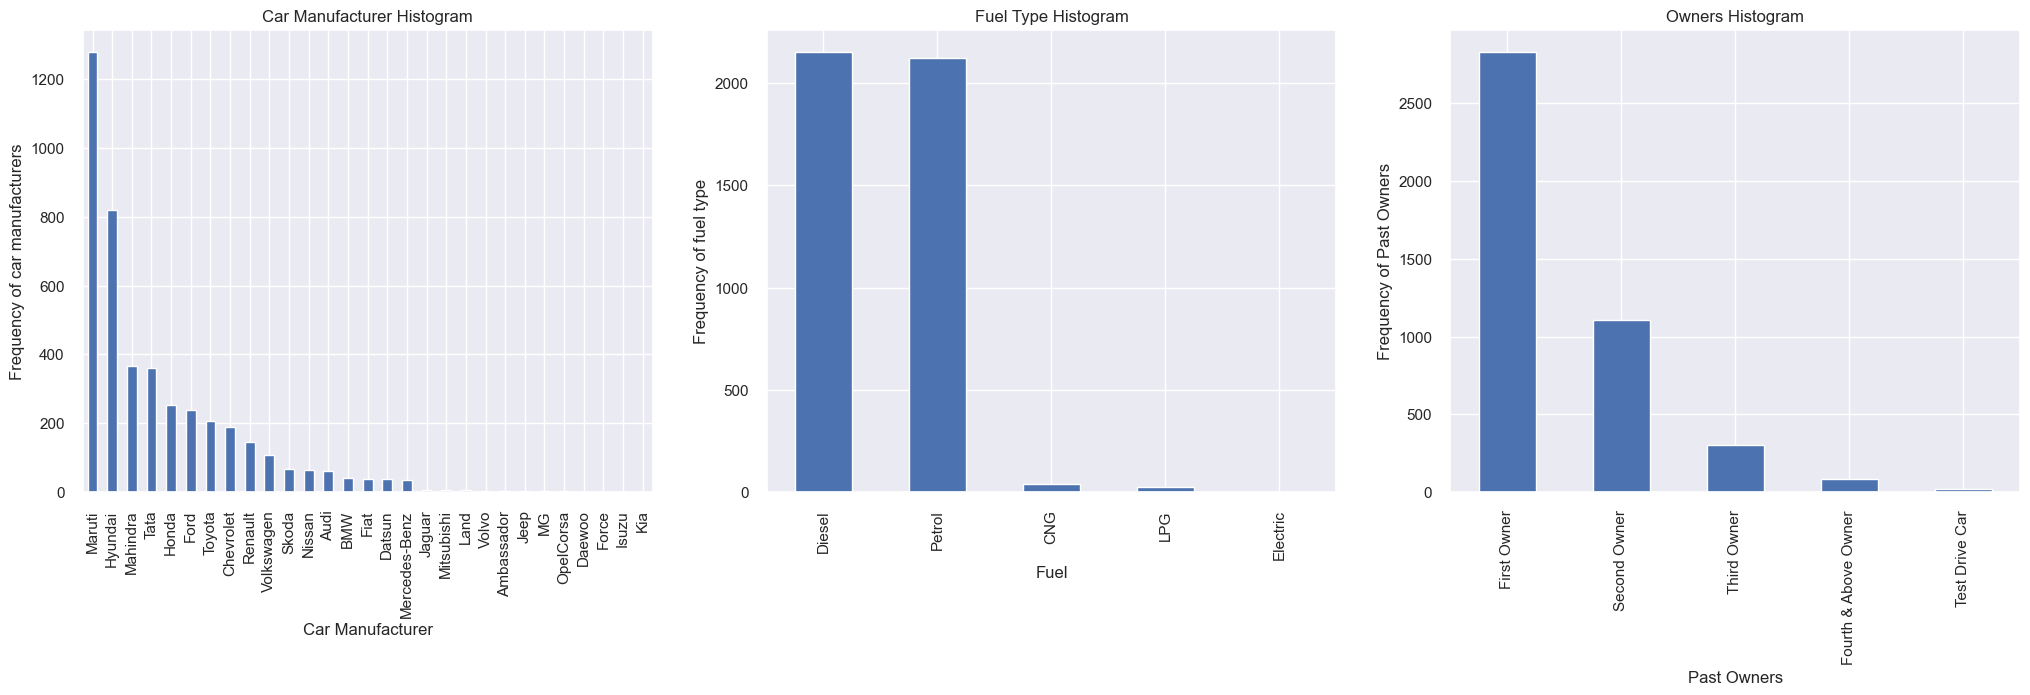

In [1692]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = cars.manufacturer.value_counts().plot(kind = 'bar')
plt.title('Car Manufacturer Histogram')
plt1.set(xlabel = 'Car Manufacturer', ylabel='Frequency of car manufacturers')

plt.subplot(1,3,2)
plt1 = cars.fuel.value_counts().plot(kind = 'bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = cars.past_owners.value_counts().plot(kind = 'bar')
plt.title('Owners Histogram')
plt1.set(xlabel = 'Past Owners', ylabel='Frequency of Past Owners')
plt.show()

In [1693]:
#Comments
#Maruti seemed to be the most favored car manufacturer followed by hyundai
#Number of diesel fueled cars are more than petrol.
#First owner cars seems to be the prefered often

<Figure size 1800x500 with 0 Axes>

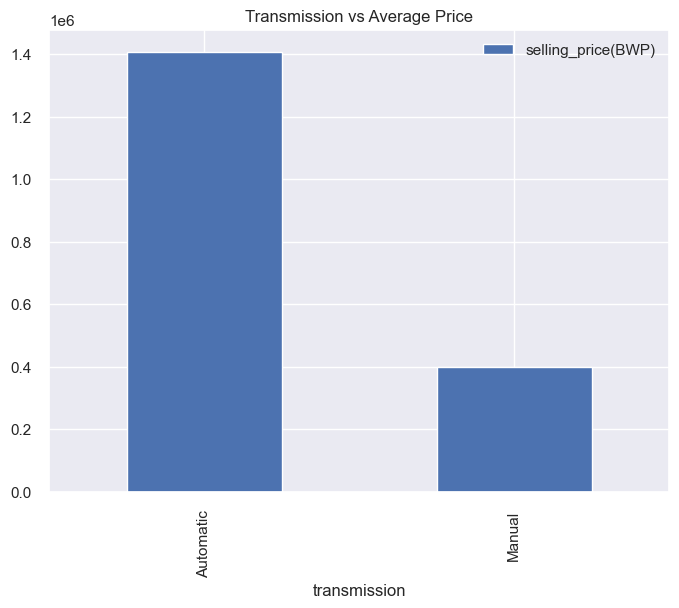

In [1694]:
plt.figure(figsize=(18,5))

t_df = pd.DataFrame(cars.groupby(['transmission'])['selling_price(BWP)'].mean().sort_values(ascending = False))
t_df.plot.bar(figsize=(8,6))
plt.title('Transmission vs Average Price')
plt.show()

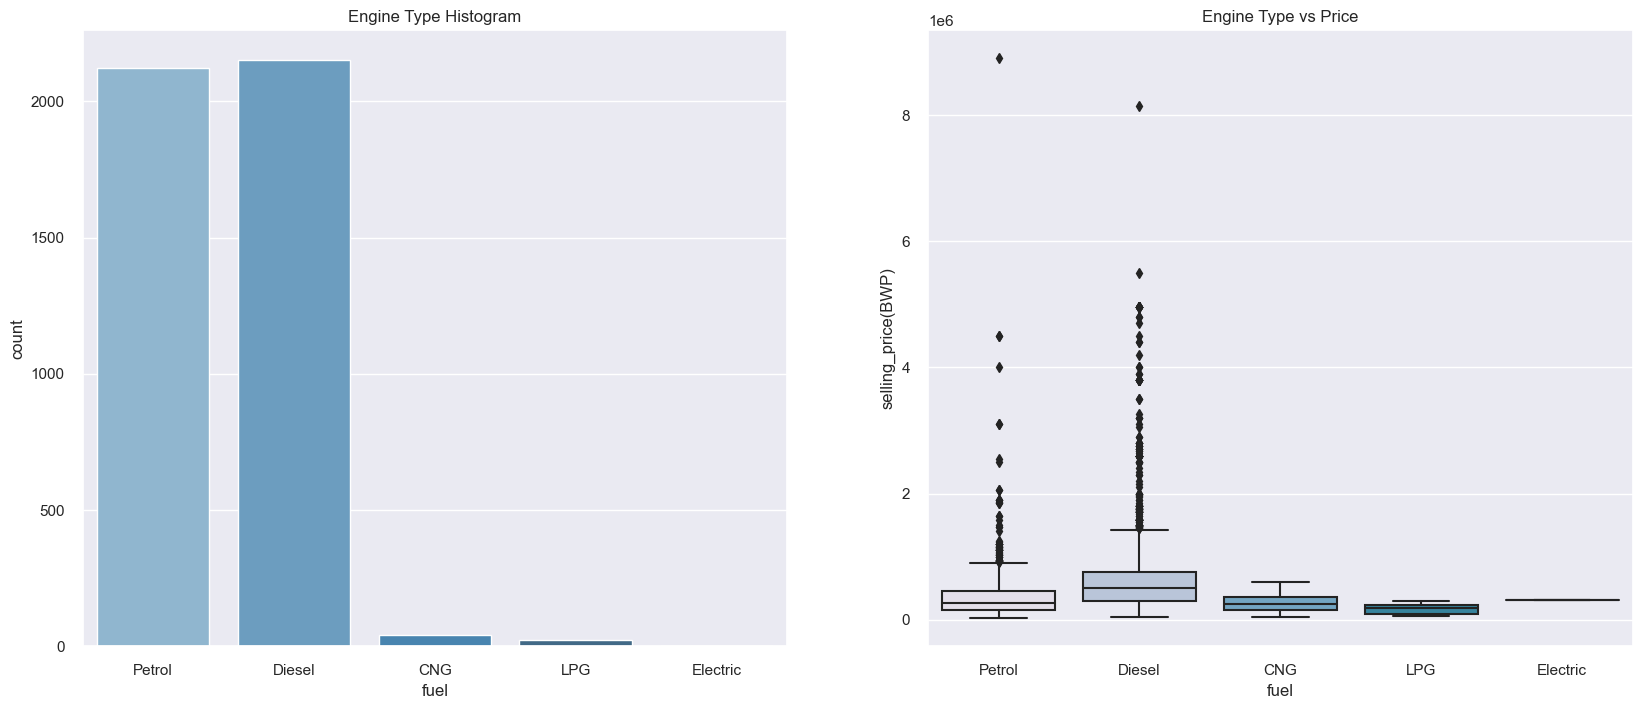

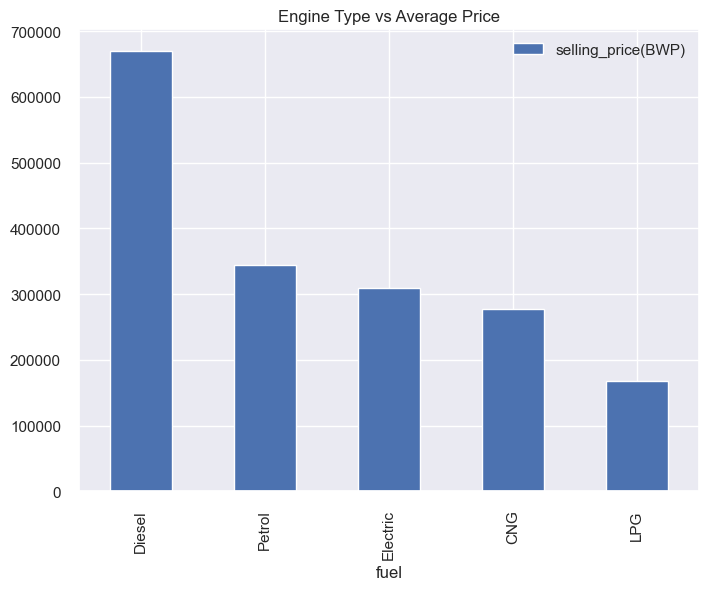

In [1695]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(cars.fuel, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x='fuel', y='selling_price(BWP)', palette=("PuBuGn"), data=cars)
plt.show()


df = pd.DataFrame(cars.groupby(['fuel'])['selling_price(BWP)'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')
plt.show()


In [1696]:
#Comments
#Diesel Engine type seems to be most favored type.
#diesel has the highest price range (While electric has only one row), cng and lpg have the lowest price range

In [1697]:
cars[cars['selling_price(BWP)'] > cars['selling_price(BWP)'].quantile(0.99)]

,selling_price(BWP),km_driven,manufacturer,fuel,seller_type,transmission,past_owners,age
89,8150000,6500,Mercedes-Benz,Diesel,Dealer,Automatic,First Owner,5
101,4500000,9800,Mercedes-Benz,Petrol,Dealer,Automatic,First Owner,4
539,4400000,100000,Mercedes-Benz,Diesel,Individual,Automatic,Second Owner,8
553,3800000,10000,Mercedes-Benz,Diesel,Dealer,Automatic,First Owner,4
555,4950000,30000,BMW,Diesel,Dealer,Automatic,First Owner,3
572,3800000,10000,Mercedes-Benz,Diesel,Dealer,Automatic,First Owner,4
574,4950000,30000,BMW,Diesel,Dealer,Automatic,First Owner,3
591,3800000,10000,Mercedes-Benz,Diesel,Dealer,Automatic,First Owner,4
593,4950000,30000,BMW,Diesel,Dealer,Automatic,First Owner,3
610,3800000,10000,Mercedes-Benz,Diesel,Dealer,Automatic,First Owner,4


In [1698]:
cars[cars['km_driven'] > cars['km_driven'].quantile(0.99)]

,selling_price(BWP),km_driven,manufacturer,fuel,seller_type,transmission,past_owners,age
69,280000,350000,Chevrolet,Diesel,Individual,Manual,Second Owner,12
70,350000,230000,Toyota,Diesel,Individual,Manual,First Owner,11
197,229999,230000,Mahindra,Diesel,Individual,Manual,Third Owner,13
525,665000,560000,Maruti,Diesel,Dealer,Manual,First Owner,6
1101,85000,300000,Tata,Diesel,Individual,Manual,Second Owner,16
1116,200000,223000,Toyota,Diesel,Individual,Manual,First Owner,17
1243,250000,806599,Maruti,Petrol,Dealer,Manual,First Owner,13
1253,715000,234000,Toyota,Diesel,Individual,Manual,First Owner,8
1414,450000,235000,Skoda,Diesel,Individual,Automatic,First Owner,11
1426,225000,223660,Mahindra,Diesel,Individual,Automatic,Third Owner,18


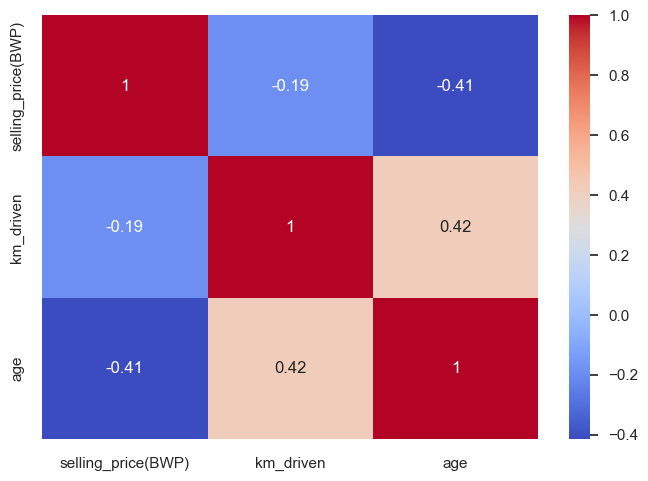

In [1699]:
#Multi-Variate Analysis
sns.heatmap(cars.corr(), annot=True, cmap="coolwarm")
plt.show()

In [1700]:
#Highly correlated variables to price are km_driven and age

In [1701]:
cars.corr()['selling_price(BWP)']

selling_price(BWP)    1.000000
km_driven            -0.192289
age                  -0.413922
Name: selling_price(BWP), dtype: float64

In [1702]:
cars.pivot_table(values='selling_price(BWP)', index = 'seller_type', columns= 'fuel')

fuel,CNG,Diesel,Electric,LPG,Petrol
seller_type,,,,,
Dealer,311444.333333,9.423081e+05,310000.0,240000.000000,475017.552863
Individual,267225.741935,5.616871e+05,NaN,164545.409091,297196.682972
Trustmark Dealer,NaN,1.184583e+06,NaN,NaN,675277.777778


In [1703]:
cars.pivot_table(values='selling_price(BWP)', index = 'seller_type', columns= 'transmission')

transmission,Automatic,Manual
seller_type,,
Dealer,1.571880e+06,484419.508366
Individual,1.191722e+06,370861.010224
Trustmark Dealer,1.953158e+06,677289.156627


<AxesSubplot:title={'center':'Price based on age of used cars'}, xlabel='age', ylabel='selling_price(BWP)'>

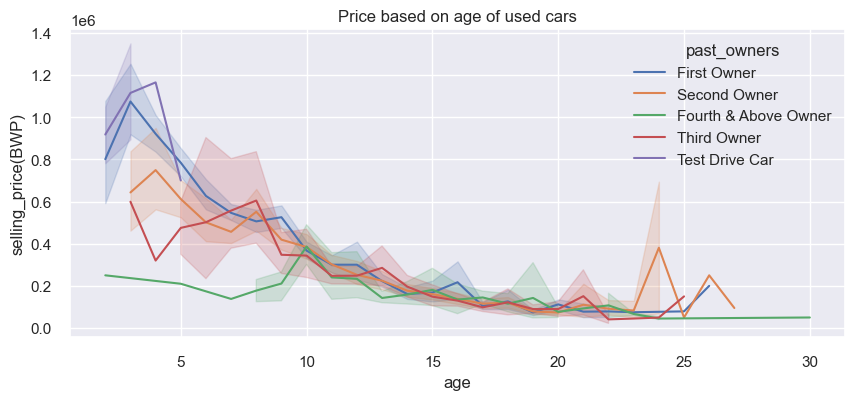

In [1704]:
# Impact of age on price
# Age, after all, is the primary determinant of depreciation
plt.figure(figsize=(10,4))
plt.title("Price based on age of used cars")
sns.lineplot(x='age', y='selling_price(BWP)',hue='past_owners',
             data=cars)

<AxesSubplot:title={'center':'Age vs Milage'}, xlabel='age', ylabel='km_driven'>

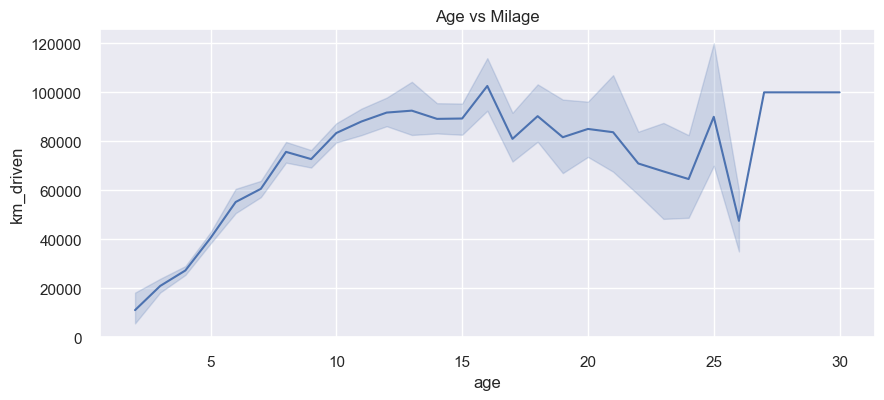

In [1705]:
#Mileage is the second big influence on the value of a car
#After all, the older your car, the more you’ll have driven it.
plt.figure(figsize=(10,4))
plt.title("Age vs Milage")
sns.lineplot(x='age', y='km_driven', data=cars)

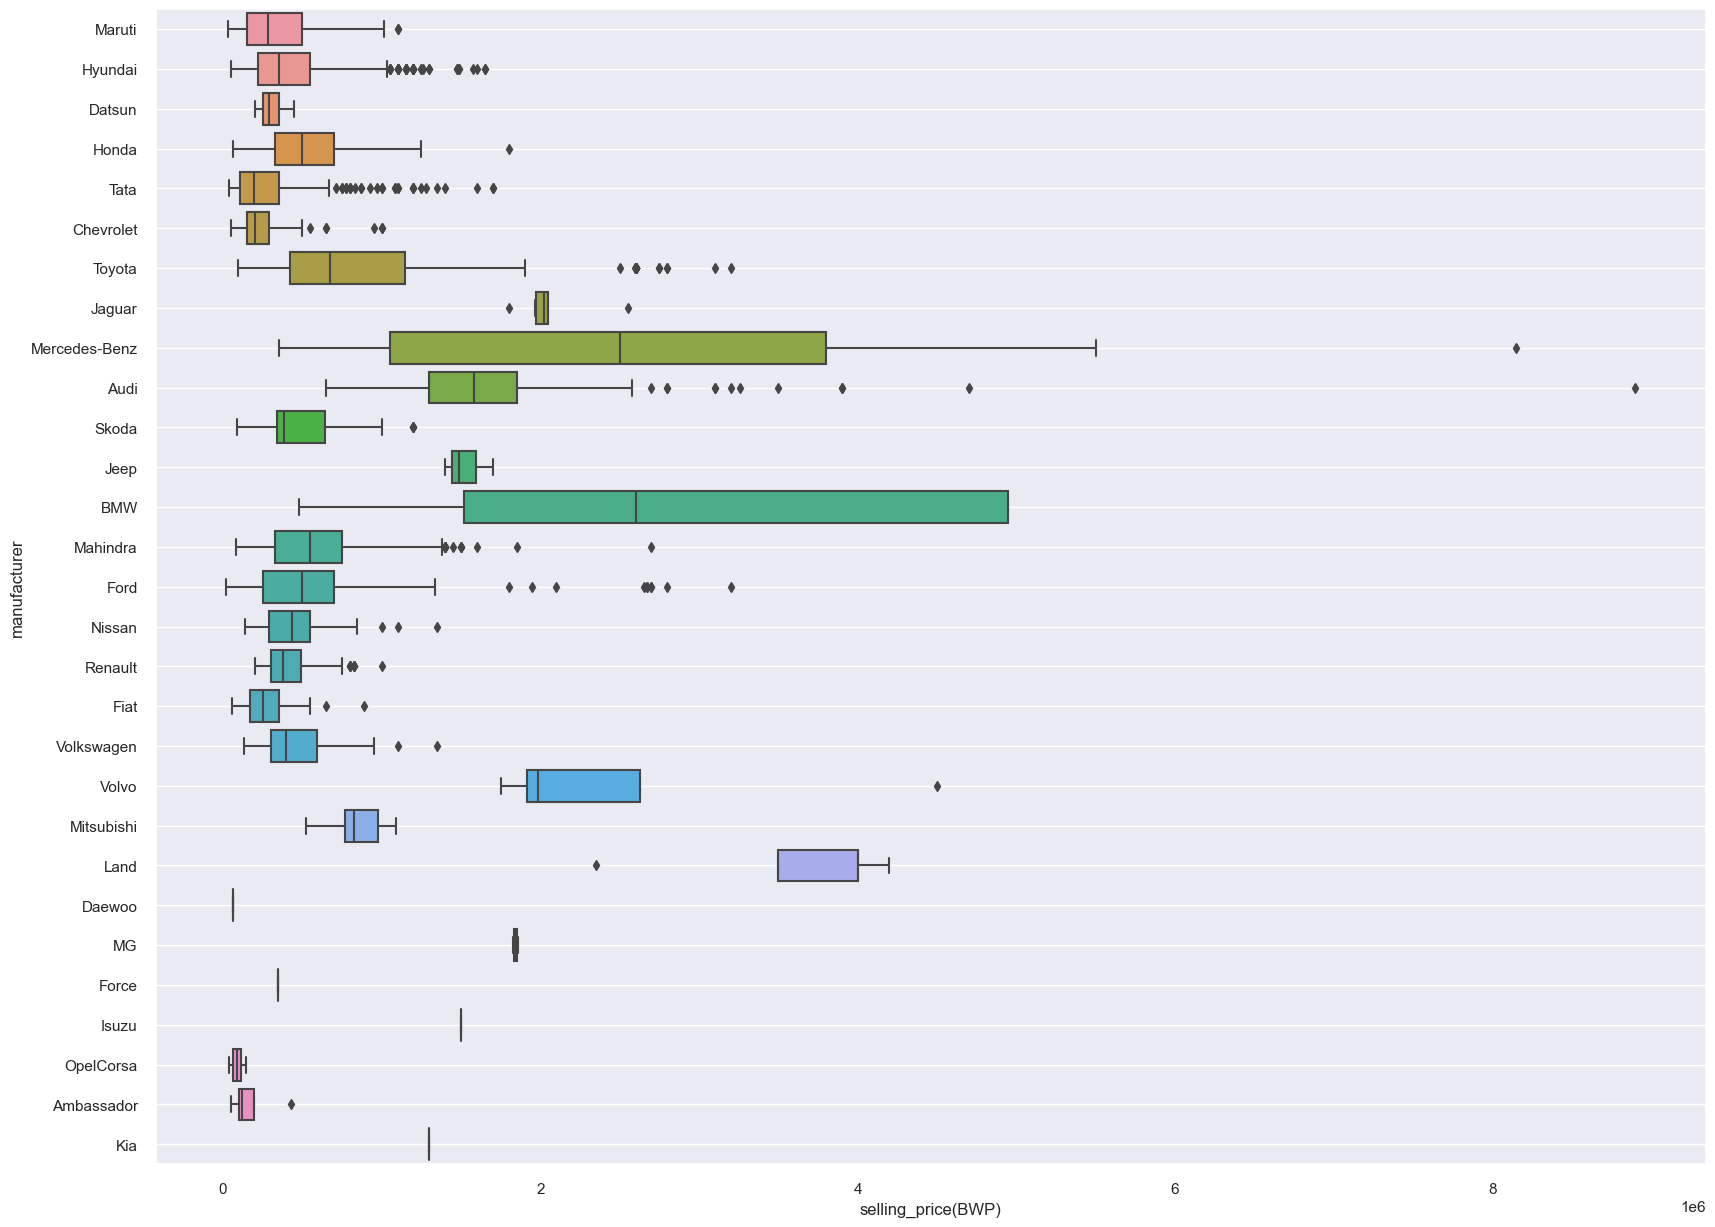

In [1706]:
#Price vs Car Manufacturer 
plt.figure(figsize=(20,15))
sns.set(font_scale=1)
sns.boxplot(x='selling_price(BWP)', y='manufacturer', data=cars)
plt.grid()

In [1707]:
#Mercedes-Benz and BMW seem to have highest average price.

In [1708]:
#Step 4: Data Preparation

In [1709]:
#Creating Dummies for Categorical Features
cars.drop(labels='manufacturer',axis= 1, inplace = True)

cars.head()

,selling_price(BWP),km_driven,fuel,seller_type,transmission,past_owners,age
0,60000,70000,Petrol,Individual,Manual,First Owner,15
1,135000,50000,Petrol,Individual,Manual,First Owner,15
2,600000,100000,Diesel,Individual,Manual,First Owner,10
3,250000,46000,Petrol,Individual,Manual,First Owner,5
4,450000,141000,Diesel,Individual,Manual,Second Owner,8


In [1710]:
cars = pd.get_dummies(data = cars,drop_first=True) 

cars.head()

,selling_price(BWP),km_driven,age,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,past_owners_Fourth & Above Owner,past_owners_Second Owner,past_owners_Test Drive Car,past_owners_Third Owner
0,60000,70000,15,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,15,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,10,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,5,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,8,1,0,0,0,1,0,1,0,1,0,0


In [1711]:
#Step 5: Splitting the Data into Training and Testing Sets
# Separating target variable and its features
y = cars['selling_price(BWP)']
X = cars.drop('selling_price(BWP)',axis=1)

In [1712]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2 ,random_state=1)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (3472, 13)
x test:  (868, 13)
y train:  (3472,)
y test:  (868,)


In [1713]:
#Step 6: Model Creation/Evaluation
#Applying regression models

    #Linear Regression
    #KNeighbors Regression
    #Ridge Regression
    #XGB Regression
    #Lasso Regression
    #Random Forest Regression
    #Gradient Boosting regression



In [1714]:
#Building prediction model
CV = []
R2_train = []
R2_test = []

def car_prediction_model(model,model_name):
    # Training model
    model.fit(X_train,y_train)
            
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    
    # Printing results
    print("R-squared Train value :",round(R2_train_model,2)*100,'%')
    print("R-squared Test value :",round(R2_test_model,2)*100,'%')
    print("Train cross_val_mean :",round(cv_mean,2))
    
    
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    plt.rcParams["font.size"] = "30"
    plt.show()
   

R-squared Train value : 45.0 %
R-squared Test value : 50.0 %
Train cross_val_mean : 0.45


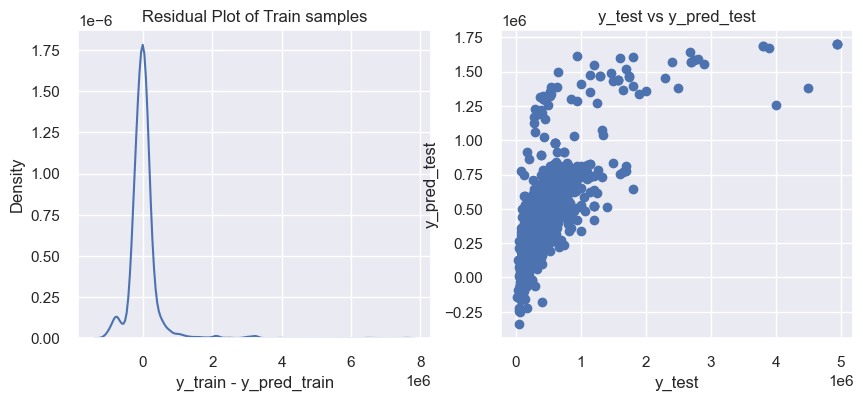

In [1715]:
#Standard Linear Regression or Ordinary Least Squares
lr = LinearRegression()
car_prediction_model(lr,"Linear_regressor.pkl")

R-squared Train value : 55.00000000000001 %
R-squared Test value : 54.0 %
Train cross_val_mean : 0.38


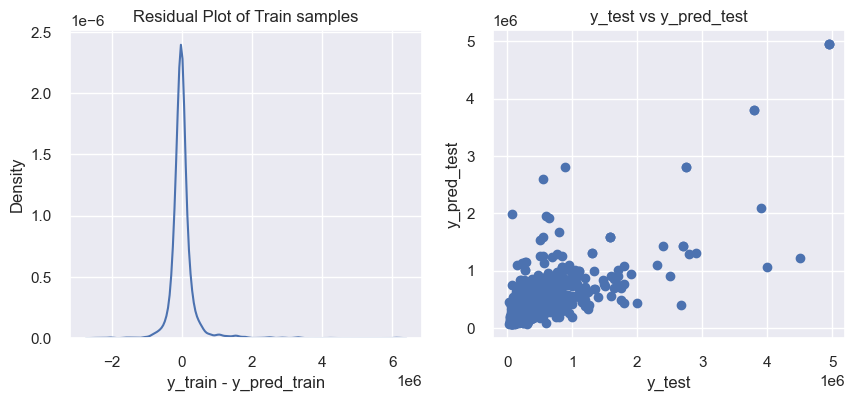

In [1716]:
#KN Regression
knr= KNeighborsRegressor(n_neighbors=6)
car_prediction_model(knr,"kneighbors.pkl")

R-squared Train value : 45.0 %
R-squared Test value : 50.0 %
Train cross_val_mean : 0.45


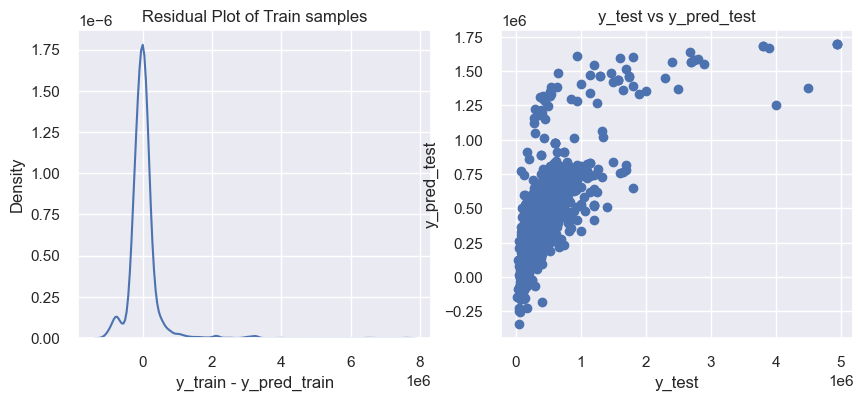

In [1717]:
#Ridge 

# Creating Ridge model object
rg = Ridge()
# range of alpha 
alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))

car_prediction_model(rg_rs,"ridge.pkl")

R-squared Train value : 45.0 %
R-squared Test value : 50.0 %
Train cross_val_mean : 0.45


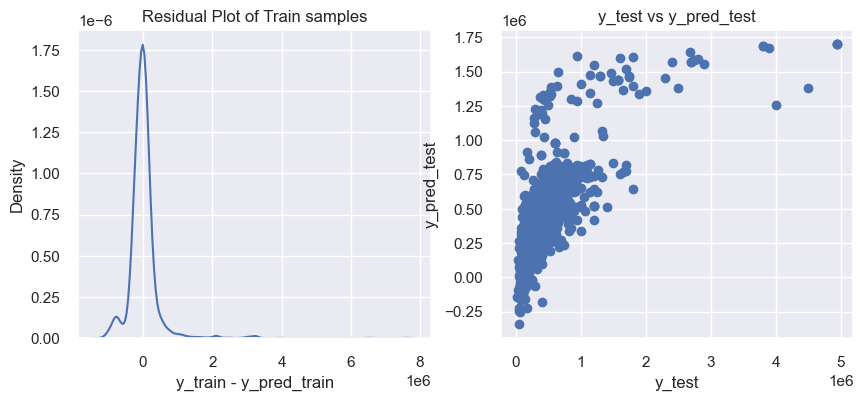

In [1718]:
#Lasso 
ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))

car_prediction_model(ls_rs,"lasso.pkl")



R-squared Train value : 94.0 %
R-squared Test value : 81.0 %
Train cross_val_mean : 0.58


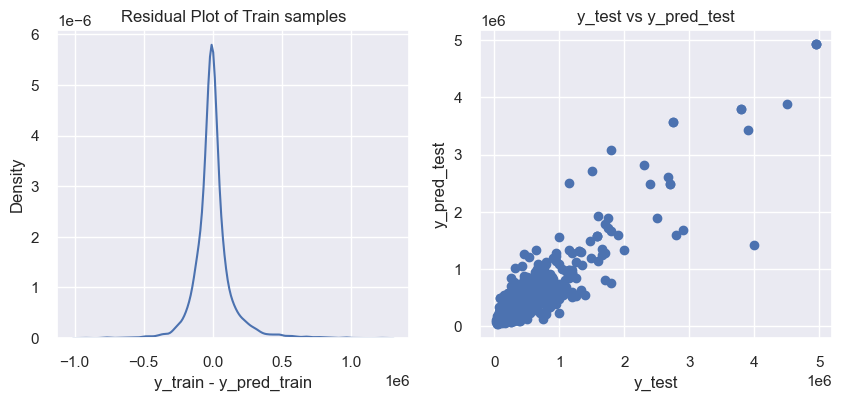

In [1719]:
#XGB Regression
xgb = XGBRegressor(n_estimators=100, max_depth=11, eta=0.09, subsample=0.6, colsample_bytree=0.8)
car_prediction_model(xgb,"xgb.pkl")

R-squared Train value : 70.0 %
R-squared Test value : 73.0 %
Train cross_val_mean : 0.61


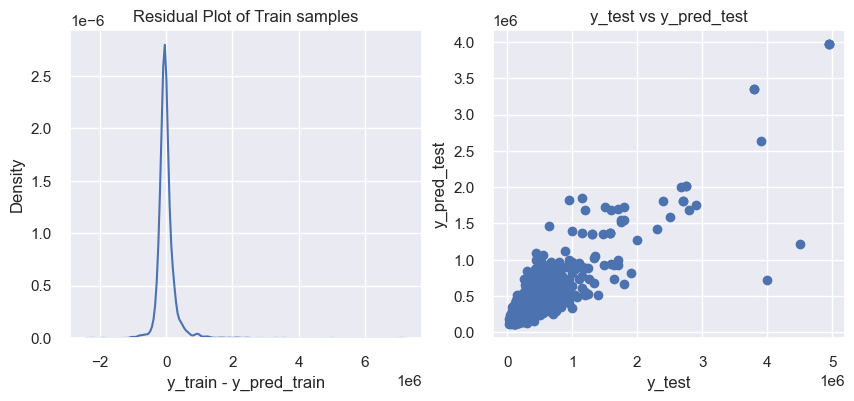

In [1720]:
#Random Forest Regression
rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)

car_prediction_model(rf_rs,'random_forest.pkl')


R-squared Train value : 68.0 %
R-squared Test value : 74.0 %
Train cross_val_mean : 0.62


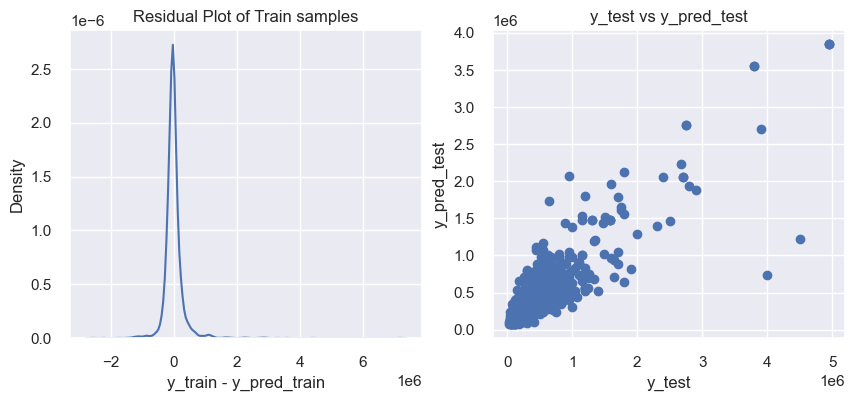

In [1721]:
#Gradient Bootsing

gb = GradientBoostingRegressor()

# Rate at which correcting is being made
learning_rate = [0.001, 0.01, 0.1, 0.2]
# Number of trees in Gradient boosting
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"learning_rate":learning_rate,
              "n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid)

car_prediction_model(gb_rs,"gradient_boosting.pkl")

,Model,R-Squared(Train),R-Squared(Test),Cross-V mean(Train)
0,LinearRegression,0.45,0.50,0.45
1,KNeighborsRegressor,0.55,0.54,0.38
2,Ridge,0.45,0.50,0.45
3,Lasso,0.45,0.50,0.45
4,XGBRegressor,0.94,0.81,0.58
5,RandomForestRegressor,0.70,0.73,0.61
6,GradientBoostingRegressor,0.68,0.74,0.62


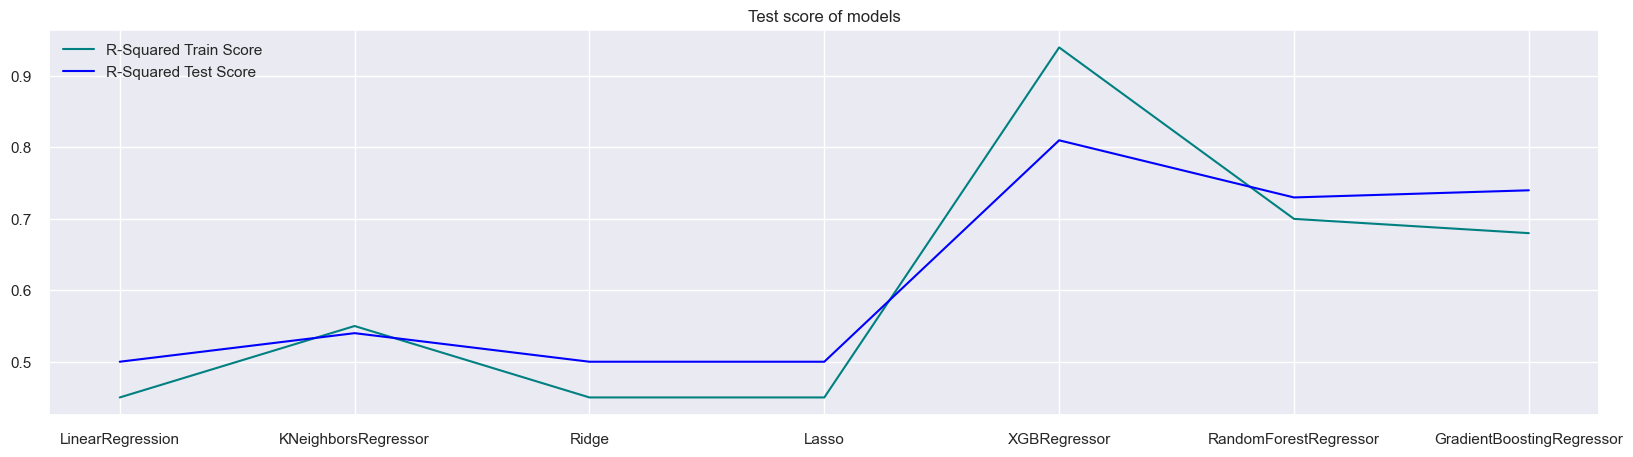

In [1723]:
Technique = ["LinearRegression","KNeighborsRegressor","Ridge","Lasso","XGBRegressor","RandomForestRegressor","GradientBoostingRegressor"]
results=pd.DataFrame({'Model': Technique,'R-Squared(Train)': R2_train,'R-Squared(Test)': R2_test,'Cross-V mean(Train)': CV})
display(results)

plt.figure(figsize=(20,5))
plt.plot(results['Model'],results['R-Squared(Train)'], color='teal')
plt.plot(results['Model'],results['R-Squared(Test)'], color='blue')
plt.title('Test score of models')
plt.legend(['R-Squared Train Score', 'R-Squared Test Score'], loc='upper left')
plt.show();


In [ ]:
#The learning curve tells us that our model performs much better in training than in testing,
#although both scores improve as we add samples. Intuitively, 
#this means that the model struggles to generalize to new, unknown cases
#Further improvements can be made.